In [1]:
# Some useful settings for interactive work
%load_ext autoreload
%autoreload 2

%matplotlib widget

import torch
torch.set_float32_matmul_precision('high')

In [2]:
# Import the relevant modules
import sousvide.synthesize.rollout_generator as rg
import sousvide.synthesize.observation_generator as og
import sousvide.instruct.train_policy as tp
import sousvide.visualize.plot_synthesize as ps
import sousvide.visualize.plot_learning as pl
import sousvide.flight.deploy_figs as df

In [3]:
cohort = "experimental"             # cohort name

# data_method = "data_gamma"        # method name
data_method = "eval_single"         # method name
eval_method = "eval_nominal"        # method name

scene = "mid_gate"                  # scene name

courses = [                         # course names
    "robustness_track",
    ]   

roster = [
    "Maverick",                     # sifu_testbed
    "Rooster_v1",                   # sift_testbed
    "Rooster_v2",                   # sift_testbed
    "Rooster_v3",                   # sift_testbed
    ]


In [ ]:
# Generate Rollouts
rg.generate_rollout_data(cohort,courses,scene,data_method)

# Review the Rollout Data
ps.plot_rollout_data(cohort)

In [ ]:
# Generate initial observation data sets
og.generate_observation_data(cohort,roster)

======================================================================
Cohort : experimental
Network: commNet
====================================================================== 
----------------------------------------------------------------------
Student: Maverick | Epochs: 3     | Data Size: 295.0/295.0
 Time: 0h 0m 2s    | Train: 0.0551 | Test: 0.0531 | Eval TTE: 216.11
 ----------------------------------------------------------------------
Student: Rooster_v1 | Epochs: 3     | Data Size: 295.0/295.0
 Time: 0h 0m 1s    | Train: 0.0695 | Test: 0.0649 | Eval TTE: 250.77
 ----------------------------------------------------------------------
Student: Rooster_v2 | Epochs: 3     | Data Size: 295.0/295.0
 Time: 0h 0m 1s    | Train: 0.0615 | Test: 0.0605 | Eval TTE: 169.48
 ----------------------------------------------------------------------
Student: Rooster_v3 | Epochs: 3     | Data Size: 295.0/295.0
 Time: 0h 0m 1s    | Train: 0.0677 | Test: 0.0627 | Eval TTE: 178.67
 ======================================================================

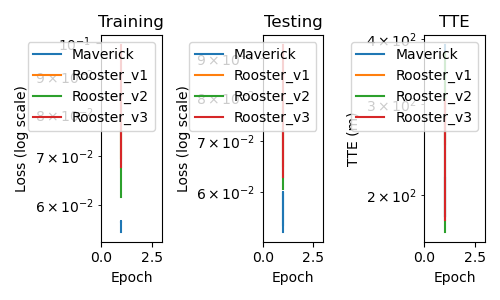

In [ ]:
# Second Stage Training
tp.train_roster(cohort,roster,"histNet",50,regen=False)

for i in range(10):
    tp.train_roster(cohort,roster,"commNet",10,regen=True,use_deploy=scene)

# pl.plot_losses(cohort,roster,"histNet")
pl.plot_losses(cohort,roster,"commNet")

In [ ]:
# Second Stage Training
tp.train_roster(cohort,roster,"histNet",50,regen=False)

for i in range(10):
    tp.train_roster(cohort,roster,"commNet",10,regen=True,use_deploy=scene)

pl.plot_losses(cohort,roster,"histNet")
pl.plot_losses(cohort,roster,"commNet")

In [ ]:
# Simulate in FiGS
for course in courses:
    df.deploy_roster(cohort,course,scene,eval_method,roster)
    pl.plot_deployments(cohort,course,roster,plot_show=True)